## Phân tích và xử lí dữ liệu với pandas 

# 1) Giới thiệu
---
**Pandas** là một thư viện mã nguồn mở được xây dựng dựa trên NumPy, sử dụng để thao tác và phân tích dữ liệu. Với Pandas chúng ta có thể:
Xử lý tập dữ liệu khác nhau về định dạng: chuỗi thời gian, bảng không đồng nhất, ma trận dữ liệu
* Import dữ liệu từ nhiều nguồn khác nhau như CSV, DB/SQL…
* Xử lý vô số phép toán cho tập dữ liệu: subsetting, slicing, filtering, merging, groupBy, re-ordering, and re-shaping,..
* Xử lý dữ liệu mất mát theo mong muốn.
* Xử lý, phân tích dữ liệu tốt như mô hình hoá và thống kê.
* Tích hợp tốt với các thư viện khác của python.

https://pandas.pydata.org/

In [2]:
#Kiểm tra phiên bản của thư viện Pandas
import pandas as pd
print('thu vien: ',pd.__version__)


thu vien:  1.2.4


# 2) Làm việc với các đối tượng trong Pandas
---
## 2.1) Series



In [2]:
#Khai báo sử dụng thư viện (pandas, numpy, matplotlib.pyplot)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Tạo một đối tượng series
#index mặc định đánh số từ 0
data = pd.Series([2.8, 3, 4.44, 5])
print(data)

0    2.80
1    3.00
2    4.44
3    5.00
dtype: float64


In [5]:
#Mỗi một đối tượng series bao gồm 2 thành phần
#1. Values
#2. index
print('Values:', data.values)
print('Indices:', data.index)

Values: [2.8  3.   4.44 5.  ]
Indices: RangeIndex(start=0, stop=4, step=1)


In [6]:
#Tạo một đối tượng series với index thiết lập
data = pd.Series([1.25, 2, 3.5, 4.75, 8.0],
                 index=['a', 'b', 'c', 'd','k'])
data

a    1.25
b    2.00
c    3.50
d    4.75
k    8.00
dtype: float64

In [7]:
print('Values:', data.values)
print('Indices:', data.index)

Values: [1.25 2.   3.5  4.75 8.  ]
Indices: Index(['a', 'b', 'c', 'd', 'k'], dtype='object')


In [8]:
#Truy cập tới một phần tử trong series thông qua index hoặc thứ tự
print('Phần tử có index = b:', data['b'])
print('Phần tử ở vị trí 1  :', data[1])

Phần tử có index = b: 2.0
Phần tử ở vị trí 1  : 2.0


In [9]:
#Tạo đối tượng series từ một biến kiểu Dictionary
#Chỉ số được tự động sắp xếp.
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict,name='Population_USA')
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: Population_USA, dtype: int64

In [10]:
#View tên của series
population.name

'Population_USA'

In [11]:
population['Florida']

19552860

In [12]:
#Chuyển đổi từ dữ liệu vector sang series
a_vector = np.array([8,12,9,0,7,11])

a_series = pd.Series(a_vector,dtype='float')
a_series


0     8.0
1    12.0
2     9.0
3     0.0
4     7.0
5    11.0
dtype: float64

## 1.2) DataFrame
---

In [13]:
#Tạo DataFrame từ các Series
area_dict = {'California': 423967, 
             'Texas': 695662, 
             'New York': 141297,
             'Florida': 170312, 
             'Illinois': 149995}
area = pd.Series(area_dict, name='Area_USA')
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: Area_USA, dtype: int64

In [14]:
data_usa = pd.DataFrame({'population':population,
                         'area':area})
data_usa

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [15]:
#Tương tự như series, DataFrame cũng có thuộc tính values và index
df_values = data_usa.values
df_index = data_usa.index
print('Values of DataFrame:\n',df_values)
print('Index of DataFrame:\n',df_index)

Values of DataFrame:
 [[38332521   423967]
 [26448193   695662]
 [19651127   141297]
 [19552860   170312]
 [12882135   149995]]
Index of DataFrame:
 Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')


In [16]:
#Tạo một DataFrame từ một biến Dict
#Chỉ số được tạo mặc định từ 0
data_dict = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]}

purchases = pd.DataFrame(data_dict)
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [17]:
#Tạo DataFrame với index thiết lập
purchases = pd.DataFrame(data_dict, 
                         index=['June', 'Robert', 'Lily', 'David'])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


# 3) Đọc dữ liệu từ các nguồn khác nhau (CSV, Excel)
---
## 3.1) Đọc file CSV


In [19]:
import pandas as pd
path = 'C:/Users/admin/Documents/Python Scripts/pandas/Data_Excercise/csv_Data_BMI.csv'
#Sử dụng phương thức read_csv
data = pd.read_csv(path)
#Hiển thị thông tin biến Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Personal   500 non-null    object
 1   Gender     500 non-null    object
 2   Height_cm  500 non-null    int64 
 3   Weight_kg  500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [20]:
#VÍ DỤ 1:
#Sử dụng phương thức read_csv()
#Tham số: Thiết lập cột index là cột Personal
data1 = pd.read_csv(path,
                    index_col=0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, P1 to P500
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     500 non-null    object
 1   Height_cm  500 non-null    int64 
 2   Weight_kg  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [21]:
#VÍ DỤ 2:
#Sử dụng phương thức read_csv()
#Thiết lập số hàng, cột muốn đọc dữ liệu
data2 = pd.read_csv(path,
                    nrows=100,
                    usecols=['Height_cm', 'Weight_kg'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Height_cm  100 non-null    int64
 1   Weight_kg  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [22]:
#VÍ DỤ 3:
#Thiết lập tham số đọc dữ liệu từ dòng thứ 5 trong file
#và đặt lại tên của các cột dữ liệu
data3 = pd.read_csv(path,
                    names=['ID','Sex','H(cm)','W(kg)'],
                    skiprows=5)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      496 non-null    object
 1   Sex     496 non-null    object
 2   H(cm)   496 non-null    int64 
 3   W(kg)   496 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.6+ KB


## THỰC HÀNH 3.1
---
**Yêu cầu 1: Đọc dữ liệu dạng CSV lưu trong file Data_Loan.csv với các tham số mặc định**

In [25]:
#{VIẾT CODE Ở ĐÂY}
import pandas as pd
path_loan = 'C:/Users/admin/Documents/Python Scripts/pandas/Data_Excercise/csv_Data_Loan.csv'
data_loan = pd.read_csv(path_loan)

data_loan.info();



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

**Yêu cầu 2: Đọc dữ liệu từ file Data_Loan.CSV vào 2 biến DataFrame tương ứng**
1. df_number: Chỉ chứa các cột dữ liệu số
2. df_object: Chỉ chứa các cột dữ liệu Object

In [2]:
#{VIẾT CODE Ở ĐÂY}
import pandas as pd
path_excel = 

## Đọc file Excel
---

In [26]:
import pandas as pd
path_excel = 'Data_Excercise\excel_Data_Point.xlsx'
#Đọc dữ liệu từ file excel
data_ex = pd.read_excel(path_excel)
data_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STT        66 non-null     int64  
 1   Mã SV      66 non-null     int64  
 2   Họ         66 non-null     object 
 3   Tên        66 non-null     object 
 4   Ngày sinh  66 non-null     object 
 5   Tên Lớp    66 non-null     object 
 6   A          66 non-null     float64
 7   B1         66 non-null     float64
 8   B2         66 non-null     float64
 9   C1         66 non-null     float64
 10  C2         66 non-null     float64
dtypes: float64(5), int64(2), object(4)
memory usage: 5.8+ KB


In [28]:
#VÍ DỤ 1:
#Đọc dữ liệu tại sheet đầu tiên, 
#Chỉ lấy dữ liệu cột Mã SV và các cột điểm 
#Thiết lập cột đầu tiên làm index
data_ex1 = pd.read_excel(path_excel,
                        sheet_name='4080130_01',
                        usecols=[1,6,7,8,9,10],
                        index_col=0)
data_ex1.head()

,A,B1,B2,C1,C2
Mã SV,,,,,
1621050322,8.0,0.0,5.0,7.5,8.0
1621050512,6.0,3.0,7.5,8.5,9.0
1621050211,6.7,4.0,6.5,3.0,5.0
1621050827,8.0,6.5,8.0,10.0,9.0
1621050298,7.0,5.0,8.0,8.5,9.0


In [29]:
#VÍ DỤ 2:
#Đọc dữ liệu tại sheet 2, 
#Trường hợp: sử dụng các tham số mặc định
data_ex2 = pd.read_excel(path_excel,
                        sheet_name=1)
data_ex2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Cộng Hòa Xã Hội Chủ Nghĩa Việt Nam  45 non-null     object
 1   Unnamed: 1                          40 non-null     object
 2   Unnamed: 2                          40 non-null     object
 3   Unnamed: 3                          40 non-null     object
 4   Unnamed: 4                          42 non-null     object
 5   Unnamed: 5                          40 non-null     object
 6   Unnamed: 6                          40 non-null     object
 7   Unnamed: 7                          40 non-null     object
 8   Unnamed: 8                          40 non-null     object
 9   Unnamed: 9                          40 non-null     object
 10  Unnamed: 10                         40 non-null     object
dtypes: object(11)
memory usage: 4.2+ KB


In [ ]:
#VÍ DỤ 3:
#Đọc dữ liệu tại sheet '4080130_02',từ dòng 9
data_ex3 = pd.read_excel(path_excel,
                         sheet_name='4080130_02',
                         skiprows=9)
data_ex3.info()

In [ ]:
#VÍ DỤ 4
#Đọc dữ liệu từ sheet: '4080130_03'
#Dữ liệu không chứa dòng header
data_ex4 = pd.read_excel(path_excel,
                        sheet_name='4080130_03',
                        header=None)
data_ex4.info()

In [ ]:
#Ví dụ 4.1
#Đọc dữ liệu từ sheet: '4080130_03'
#Dữ liệu không chứa dòng header
#Đặt tên cho các cột
data_ex41 = pd.read_excel(path_excel,
                        sheet_name='4080130_03',
                        header=None,
                        usecols=[1,6,7,8,9,10],
                        names=['Mã SV','A','B1','B2','C1','C2'],
                        index_col=0)
data_ex41.info()

## THỰC HÀNH 3.2
--- 
Yêu cầu: Đọc dữ liệu dạng excel lưu trong file excel_Data_Movies.xls theo từng sheet

In [31]:
#{VIẾT CODE Ở ĐÂY}
import pandas as pd
path = 'C:/Users/admin/Documents/Python Scripts/pandas/Data_Excercise/excel_Data_Movies.xls'
read = pd.read_excel(path)
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Title                        1338 non-null   object 
 1   Year                         1338 non-null   int64  
 2   Genres                       1338 non-null   object 
 3   Language                     1334 non-null   object 
 4   Country                      1338 non-null   object 
 5   Content Rating               1316 non-null   object 
 6   Duration                     1338 non-null   int64  
 7   Aspect Ratio                 1308 non-null   float64
 8   Budget                       1281 non-null   float64
 9   Gross Earnings               1086 non-null   float64
 10  Director                     1338 non-null   object 
 11  Actor 1                      1338 non-null   object 
 12  Actor 2                      1338 non-null   object 
 13  Actor 3           

# 3) Quan sát và truy suất dữ liệu từ DataFrame
---
## 3.1) Quan sát dữ liệu

In [11]:
#Đọc dữ liệu mẫu được lưu trữ trong file csv
path='Data_Excercise\csv_Data_Loan.csv'
df_loan=pd.read_csv(path)
df_loan

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified


In [33]:
#Quan sát dữ liệu biến DataFrame
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

In [12]:
#Hiển thị 10 dòng đầu tiên
df_loan.head(12)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
5,3000,36 months,18.64,9.0,RENT,48000.0,car,CA,5.35,0.0,87.5,4.0,0,4.0,verified
6,5600,60 months,21.28,4.0,OWN,40000.0,small_business,CA,5.55,0.0,32.6,13.0,1,7.0,verified
7,5375,60 months,12.69,0.0,RENT,15000.0,other,TX,18.08,0.0,36.5,3.0,1,7.0,verified
8,6500,60 months,14.65,5.0,OWN,72000.0,debt_consolidation,AZ,16.12,0.0,20.6,23.0,0,13.0,not verified
9,12000,36 months,12.69,10.0,OWN,75000.0,debt_consolidation,CA,10.78,0.0,67.1,34.0,0,22.0,verified


In [35]:
#Hiển thị 5 dòng cuối cùng của biến df_loan
df_loan.tail()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified
163986,17000,60 months,15.99,10.0,MORTGAGE,63078.0,debt_consolidation,PA,31.70,0.0,54.0,28.0,0,16.0,verified


In [13]:
#Hiển thị kích thước df_loan (rows x columns)
df_loan.shape

(163987, 15)

In [37]:
#Danh sách tên các columns trong df
df_loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'revol_util', 'total_acc', 'bad_loan', 'longest_credit_length',
       'verification_status'],
      dtype='object')

In [ ]:
#Kiếm tra giá trị null trong Df
df_loan.isnull()

In [ ]:
#Thống kê số lượng null theo cột
df_loan.isnull().sum()

In [38]:
#Cho biết số dòng dữ liệu không null
df_loan.count()

loan_amnt                163987
term                     163987
int_rate                 163987
emp_length               158183
home_ownership           163987
annual_inc               163983
purpose                  163987
addr_state               163987
dti                      163987
delinq_2yrs              163958
revol_util               163794
total_acc                163958
bad_loan                 163987
longest_credit_length    163958
verification_status      163987
dtype: int64

In [39]:
#Số phần tử trong df (= rows x columns)
df_loan.size


2459805

In [14]:
#Kiểu dữ liệu của từng columns trong df
df_loan.dtypes

loan_amnt                  int64
term                      object
int_rate                 float64
emp_length               float64
home_ownership            object
annual_inc               float64
purpose                   object
addr_state                object
dti                      float64
delinq_2yrs              float64
revol_util               float64
total_acc                float64
bad_loan                   int64
longest_credit_length    float64
verification_status       object
dtype: object

In [40]:
#Quan sát một số đặc trưng thống kê của df
#Mặc định thống kê các cột dữ liệu số
df_loan.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,163987.000000,163987.000000,158183.000000,1.639830e+05,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000
mean,13074.169141,13.715904,5.684353,7.191567e+04,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274
std,7993.556189,4.391940,3.610664,5.907092e+04,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733
min,500.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7000.000000,10.650000,2.000000,4.500000e+04,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000
50%,11325.000000,13.490000,6.000000,6.100000e+04,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000
75%,18000.000000,16.320000,10.000000,8.500000e+04,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000
max,35000.000000,26.060000,10.000000,7.141778e+06,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000


In [21]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

In [ ]:
df_loan.head(10)

In [41]:
#Quan sát một số đặc trưng thống kê của df
#Thống kê các cột dữ liệu Object
df_loan.describe(include='O')

,term,home_ownership,purpose,addr_state,verification_status
count,163987,163987,163987,163987,163987
unique,2,6,14,50,2
top,36 months,MORTGAGE,debt_consolidation,CA,verified
freq,129950,79714,93261,28702,104832


In [42]:
#Thống kê tất cả các cột dữ liệu ko phân biệt số, object
df_loan.describe(include='all')

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
count,163987.000000,163987,163987.000000,158183.000000,163987,1.639830e+05,163987,163987,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000,163987
unique,NaN,2,NaN,NaN,6,NaN,14,50,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,36 months,NaN,NaN,MORTGAGE,NaN,debt_consolidation,CA,NaN,NaN,NaN,NaN,NaN,NaN,verified
freq,NaN,129950,NaN,NaN,79714,NaN,93261,28702,NaN,NaN,NaN,NaN,NaN,NaN,104832
mean,13074.169141,NaN,13.715904,5.684353,NaN,7.191567e+04,NaN,NaN,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274,NaN
std,7993.556189,NaN,4.391940,3.610664,NaN,5.907092e+04,NaN,NaN,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733,NaN
min,500.000000,NaN,5.420000,0.000000,NaN,1.896000e+03,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,7000.000000,NaN,10.650000,2.000000,NaN,4.500000e+04,NaN,NaN,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000,NaN
50%,11325.000000,NaN,13.490000,6.000000,NaN,6.100000e+04,NaN,NaN,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000,NaN
75%,18000.000000,NaN,16.320000,10.000000,NaN,8.500000e+04,NaN,NaN,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000,NaN


In [43]:
#Quan sát đặc trưng thống kê theo từng cột
#Dữ liệu số
df_loan[['loan_amnt']].describe()

,loan_amnt
count,163987.000000
mean,13074.169141
std,7993.556189
min,500.000000
25%,7000.000000
50%,11325.000000
75%,18000.000000
max,35000.000000


In [44]:
#Quan sát đặc trưng thống kê theo từng cột
#Dữ liệu Object
df_loan[['term']].describe()

,term
count,163987
unique,2
top,36 months
freq,129950


## 3.2) Truy xuất dữ liệu trong DataFrame
---

In [5]:
#Truy xuất dữ liệu theo cột
#Lấy dữ liệu của một cột
import pandas as pd
path='Data_Excercise\csv_Data_Loan.csv'
df_loan=pd.read_csv(path)
df_state = df_loan[['addr_state']]
df_state.head()



,addr_state
0,AZ
1,GA
2,IL
3,CA
4,AZ


In [47]:
#Truy xuất dữ liệu theo cột
#Chỉ lấy dữ liệu của 3 cột: loan_amnt, int_rate, purpose
df_loan1 = df_loan[['loan_amnt','int_rate','purpose']]
df_loan1.head()

,loan_amnt,int_rate,purpose
0,5000,10.65,credit_card
1,2500,15.27,car
2,2400,15.96,small_business
3,10000,13.49,other
4,5000,7.90,wedding


#### df.iloc[[index_row],[index_col]]: Truy cập tới dữ liệu của hàng và cột qua chỉ số index_row, index_col (tương tự như với Numpy)

In [48]:
#Sử dụng .iloc truy xuất dữ liệu như với Numpy
#Truy xuất 10 dòng dữ liệu từ [10 --> 20) tất cả các cột --- index = 0
df_loan.iloc[10:20,2:5]

,int_rate,emp_length,home_ownership
10,13.49,0.0,RENT
11,9.91,3.0,RENT
12,10.65,3.0,RENT
13,16.29,0.0,RENT
14,15.27,4.0,RENT
15,6.03,10.0,MORTGAGE
16,11.71,1.0,MORTGAGE
17,6.03,6.0,RENT
18,12.42,10.0,RENT
19,11.71,10.0,OWN


In [49]:
#Truy xuất 100 dòng dữ liệu đầu tiên,
#của các cột có index 0, 4, 6, 7
df_loan.iloc[:100,[0,4,6,7]]

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
...,...,...,...,...
95,24000,RENT,debt_consolidation,CA
96,6000,RENT,debt_consolidation,CA
97,6000,RENT,debt_consolidation,AZ
98,2100,MORTGAGE,vacation,LA


In [67]:
#Truy cập dòng dữ liệu 10, cột 7
df_loan.iloc[4,0]

5000

In [72]:
#Truy cập dòng dữ liệu 10, dòng 7
#Cột dữ liệu 0, 1, 5
df_loan.iloc[[10,7],[0,1,5]]

,loan_amnt,term,annual_inc
10,9000,36 months,30000.0
7,5375,60 months,15000.0


#### df.loc[[index_row],[name_col]]: Truy cập tới dữ liệu của hàng và cột qua chỉ số index_row, tên cột name_col

In [77]:
#Truy cập từ dòng có index 20 đến dòng 25 của df
#chỉ lấy dữ liệu 4 cột: loan_amnt, home_ownership, purpose, addr_state
df_loan.loc[20:25,['loan_amnt','home_ownership','purpose','addr_state']]

,loan_amnt,home_ownership,purpose,addr_state
20,10000,RENT,debt_consolidation,CA
21,6000,RENT,major_purchase,CA
22,15000,MORTGAGE,credit_card,IL
23,15000,RENT,debt_consolidation,NY
24,5000,RENT,other,PA
25,4000,MORTGAGE,debt_consolidation,FL


# 4) Replacing Values and Renamde Columns
---
## 4.1) Replacing values

In [8]:
#tách lấy dataframe để thực hiện replacing values
df_new = df_loan.loc[:10,['loan_amnt',
                          'home_ownership',
                          'purpose',
                          'addr_state']]
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [9]:
#Thay thế giá trị purpose: credit_card--> wedding
#của index đầu tiên
df_new.loc[0,'purpose'] = 'wedding'
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [52]:
#Thay thế giá trị thuộc tính loan_amnt: 2400 --> 8800
#của index = 2
df_new.iloc[2,0] = 8800
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,8800,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [10]:
#Thay thế nhiều giá trị trong DataFrame
#RENT --> MORTGAGE
#car --> small_business
df_new.replace({'RENT':'MORTGAGE',
                'car':'small_business'})

,loan_amnt,home_ownership,purpose,addr_state
0,5000,MORTGAGE,wedding,AZ
1,2500,MORTGAGE,small_business,GA
2,2400,MORTGAGE,small_business,IL
3,10000,MORTGAGE,other,CA
4,5000,MORTGAGE,wedding,AZ
5,3000,MORTGAGE,small_business,CA
6,5600,OWN,small_business,CA
7,5375,MORTGAGE,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [11]:
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [ ]:
#Khi muốn thay đổi áp dụng lên DataFrame hiện tại
#Thiết lập tham số inplace=True
df_new.replace({'RENT':'MORTGAGE',
                'car':'small_business'}, inplace=True)
df_new

In [ ]:
df_new.replace({5000:8000}, inplace=True)
df_new

In [ ]:
#Thay thế tên viết tắt bằng tên đầy đủ.
state_name={'AZ':'Arizona',
            'GA':'Georgia',
            'IL':'Illinois',
            'CA':'California',
            'TX':'Texas',
            'VA':'Virgrinia'}
#Trong cột addr_state
df_new['addr_state'].replace(state_name,inplace=True)
df_new

## 4.2) Thay đổi tên cột trong DataFrame
---

In [18]:
df_new = df_loan[['loan_amnt','home_ownership','purpose','addr_state']].copy()
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
...,...,...,...,...
163982,15000,MORTGAGE,credit_card,OK
163983,20000,OWN,home_improvement,VA
163984,12825,MORTGAGE,debt_consolidation,TX
163985,27650,RENT,credit_card,NY


In [19]:
#Đổi tên cột
t = df_new.rename(columns={'loan_amnt':'Số tiền vay',
                       'home_ownership':'Tình trạng nhà ở',
                       'purpose': ' Mục đích vay tiền',
                       'addr_state':'Địa chỉ'})
t.head()

,Số tiền vay,Tình trạng nhà ở,Mục đích vay tiền,Địa chỉ
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ


In [12]:
#Muốn áp dụng thay đổi vào trực tiếp biến df, sử dụng inplace=True
df_new.rename(columns={'loan_amnt':'Số tiền vay',
                       'home_ownership':'Tình trạng nhà ở',
                       'purpose': ' Mục đích vay tiền',
                       'addr_state':'Địa chỉ'}, inplace=True)
df_new.head()

,Số tiền vay,Tình trạng nhà ở,Mục đích vay tiền,Địa chỉ
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ


In [ ]:
#Đổi tên cột sang viết hoa
df_new.rename(str.upper, axis='columns')

In [ ]:
df_new

## Thực hành 1
---
**Yêu cầu 1.1:**
1. Đọc dữ liệu từ file .csv vào biến kiểu dataframe: df_patient với cột đầu tiên (id) là cột chỉ số (index_col)
2. Hiển thị thông tin tổng quan của tập dữ liệu
3. Hiển thị thông tin của 10 bệnh nhân đầu tiên và 5 bệnh nhân cuối cùng của tập dữ liệu.
4. Đặt lại tên các cột dữ liệu trong Dataframe: 
    * Feature_1 --> Age
    * Feature_2 --> Gender
    * Feature_3 --> Type
    * Feature_4 --> Blood_pressure
    * Feature_5 --> Cholesterol
    * Feature_6 --> Heartbeat
    * Feature_7 --> Thalassemia
    * Feature_8 --> Result

In [20]:
#{VIẾT CODE Ở ĐÂY}
import pandas as pd
path = 'C:/Users/admin/Documents/Python Scripts/pandas/Data_Excercise/Data_Patient.csv'
read = pd.read_csv(path)
read.head(10)
read.tail(5)
read.rename(columns={'feature_1':'Age',
                       'feature_2':'Gender',
                       'feature_3': ' Type',
                       'feature_4':'Blood_pressure',
                       'feature_5':'Cholesterol',
                      'feature_6':'Heartbeat', 
                      'feature_7':'Thalassemia', 
                      'feature_8':'Result' 
                    }, inplace=True)
read



,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
0,Patient_01,63,Male,Typical angina,145,233,150,6.0,0
1,Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
2,Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
3,Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
4,Patient_05,41,Female,Atypical angina,130,204,172,NaN,0
...,...,...,...,...,...,...,...,...,...
295,Patient_296,59,Male,Asymptomatic,164,176,90,6.0,1
296,Patient_297,57,Female,Asymptomatic,140,241,123,7.0,1
297,Patient_298,45,Male,Typical angina,110,264,132,7.0,1
298,Patient_299,68,Male,Asymptomatic,144,193,141,7.0,1


**Yêu cầu 1.2:**
Sử dụng phương thức .describe() cho biết:
    
    * Thuộc tính Age:
        - Tuổi của bệnh nhân trẻ nhất
        - Tuổi của bệnh nhân già nhất
    * Thuộc tính Cholesterol:
        - Cholesterol trung bình của các bệnh nhân
        - Độ lệch chuẩn của giá trị này trong toàn bộ tập dữ liệu
    * Bao nhiêu bệnh nhân giới tính nam (Male)
    * Có bao nhiêu giá trị khác nhau của thuộc tính Type. Giá trị xuất hiện nhiều nhất là giá trị nào, bao nhiêu lần.

In [62]:
#{VIẾT CODE Ở ĐÂY}
import pandas as pd
path = 'C:/Users/admin/Documents/Python Scripts/pandas/Data_Excercise/Data_Patient.csv'
read = pd.read_csv(path)
read.rename(columns={'feature_1':'Age',
                       'feature_2':'Gender',
                       'feature_3': 'Type',
                       'feature_4':'Blood_pressure',
                       'feature_5':'Cholesterol',
                      'feature_6':'Heartbeat', 
                      'feature_7':'Thalassemia', 
                      'feature_8':'Result' 
                    }, inplace=True)
#read[['Gender']].describe().loc['freq']
# read[['Age']].describe().loc['max']
# read[['Age']].describe().loc['min']
# read[['Cholesterol']].describe().loc['mean']
# read[['Cholesterol']].describe().loc['std']

# read[['Type']].describe().loc['unique']
read[['Type']].describe().loc['top']








Type    Asymptomatic
Name: top, dtype: object

**Yêu cầu 1.3:**

Cho biết những cột nào trong dữ liệu có chứa missing data và số lượng missing là bao nhiêu?

In [31]:
#{VIẾT CODE Ở ĐÂY}

missing_data =   read.iloc[:].isnull().sum()
missing_data



id                0
Age               0
Gender            0
Type              5
Blood_pressure    0
Cholesterol       0
Heartbeat         0
Thalassemia       7
Result            0
dtype: int64

**Yêu cầu 1.4:**
Hiển thị thông tin của các bệnh nhân: 
   * Bệnh nhân có index: Patient_100; Patient_150; Patient_200
   * Bệnh nhân ở vị trí 255 đến 260, với 3 thuộc tính: Age, Gender và Result

In [79]:
#{VIẾT CODE Ở ĐÂY}


#read.loc[100,:]
#read.loc[150,:]
#read.loc[200,:]

read.loc[255:260,['Age','Gender','Result']]



,Age,Gender,Result
255,67,Female,0
256,76,Female,0
257,70,Male,0
258,57,Male,1
259,44,Female,0
260,58,Female,1


**Yêu cầu 1.5:**
1. Thay đổi giá trị cho thuộc tính Gender: Male --> 0, Female --> 1
2. Thay đổi giá trị cho thuộc tính Result: 0 --> No, 1 --> Yes
3. Cập nhật giá trị thuộc tính Thalassemia của bệnh nhân có index: Patient_05 bằng giá trị 4.0

In [25]:
#{VIẾT CODE Ở ĐÂY}
#read.replace({'Male':'0','Female':'1'})
import pandas as pd
path = 'C:/Users/admin/Documents/Python Scripts/pandas/Data_Excercise/Data_Patient.csv'
read = pd.read_csv(path)
read.rename(columns={'feature_1':'Age',
                       'feature_2':'Gender',
                       'feature_3': 'Type',
                       'feature_4':'Blood_pressure',
                       'feature_5':'Cholesterol',
                      'feature_6':'Heartbeat', 
                      'feature_7':'Thalassemia', 
                      'feature_8':'Result' 
                    }, inplace=True)
result = {
    0:'No',
    1:'Yes'
}
read.replace(result,inplace =True)
read.replace({'Male':'0','Female':'1'},inplace = True)
read.loc[5,['Thalassemia']] = 4.0
read.head(10)

,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
0,Patient_01,63,0,Typical angina,145,233,150,6.0,No
1,Patient_02,67,0,Asymptomatic,160,286,108,3.0,Yes
2,Patient_03,67,0,Asymptomatic,120,229,129,7.0,Yes
3,Patient_04,37,0,Non-anginal pain,130,250,187,3.0,No
4,Patient_05,41,1,Atypical angina,130,204,172,NaN,No
5,Patient_06,56,0,Atypical angina,120,236,178,4.0,No
6,Patient_07,62,1,Asymptomatic,140,268,160,3.0,Yes
7,Patient_08,57,1,Asymptomatic,120,354,163,3.0,No
8,Patient_09,63,0,Asymptomatic,130,254,147,7.0,Yes
9,Patient_10,53,0,Asymptomatic,140,203,155,7.0,Yes


## 5) Filter Data
---

In [8]:
path = 'Data_Excercise/csv_Data_BMI.csv'
df_bmi = pd.read_csv(path)
df_bmi

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87
2,P3,Female,185,110
3,P4,Female,195,104
4,P5,Male,149,61
...,...,...,...,...
495,P496,Female,150,153
496,P497,Female,184,121
497,P498,Female,141,136
498,P499,Male,150,95


In [27]:
df_bmi.head()

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87
2,P3,Female,185,110
3,P4,Female,195,104
4,P5,Male,149,61


In [28]:
#lọc danh sách người giới tính nam
#Cách 1:
df_male1 = df_bmi[df_bmi.Gender=='Male']
df_male1.head()

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87
4,P5,Male,149,61
5,P6,Male,189,104
6,P7,Male,147,92


In [9]:
#Cách 2: sử dụng phương thức query
df_male2 = df_bmi.query('Gender=="Male"')
df_male2.head()

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87
4,P5,Male,149,61
5,P6,Male,189,104
6,P7,Male,147,92


In [29]:
#Cách 3: sử dụng iloc
df_male3 = df_bmi.loc[(df_bmi.Gender=="Male")]
df_male3.head()

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87
4,P5,Male,149,61
5,P6,Male,189,104
6,P7,Male,147,92


In [10]:
#Kết hợp nhiều tiêu chí lọc dữ liệu
#lọc người có giới tính Femal và cân nặng dưới 70kg
df_p1 = df_bmi[(df_bmi.Gender =='Female') & (df_bmi.Weight_kg<70)]
df_p1

,Personal,Gender,Height_cm,Weight_kg
24,P25,Female,172,67
25,P26,Female,151,64
32,P33,Female,195,65
51,P52,Female,176,54
60,P61,Female,191,54
67,P68,Female,168,59
70,P71,Female,153,51
99,P100,Female,190,50
116,P117,Female,165,57
140,P141,Female,169,54


In [ ]:
#Kết hợp nhiều tiêu chí lọc dữ liệu
#lọc người có chiều cao > 195 cm hoặc cân nặng > 150kg
df_p2 = df_bmi[(df_bmi.Height_cm >195) | (df_bmi.Weight_kg>150)]
df_p2

In [ ]:
# toán tử ~ - Not
df_p3 = df_bmi[~(df_bmi.Weight_kg<155)]
df_p3

In [ ]:
#Lọc ra những người có cân nặng bằng 150, 155 và 160kg
# phương thức isin (tương tự như in)
df_p4 = df_bmi[df_bmi.Weight_kg.isin([150,155,160])]
df_p4

In [ ]:
df_bmi[df_bmi.Weight_kg.isin([150,155,160])].count()


## 6) Đặc trưng thống kê
---

In [30]:
#Tính tổng theo cột chiều cao
df_bmi['Height_cm'].sum()

84972

In [ ]:
#Tính tổng trong toàn bộ DataFrame
df_bmi.sum()

In [ ]:
#tìm Max, Min của thuộc tính cân nặng
w_max = df_bmi['Weight_kg'].max()
w_min = df_bmi['Weight_kg'].min()
print('Cân nặng lớn nhất:',w_max, '(kg)')
print('Cân nặng nhỏ nhất:',w_min, '(kg)')

In [ ]:
#tìm Max, Min của thuộc tính cân nặng
w_max = df_bmi['Height_cm'].max()
w_min = df_bmi['Height_cm'].min()
print('Chiều cao lớn nhất:',w_max, '(cm)')
print('Chiều cao nhỏ nhất:',w_min, '(cm)')

In [ ]:
#cộng dồn giá trị các phần tử theo hàng
df_bmi['Weight_kg'].cumsum()

In [ ]:
#tìm Mean, Median
w_mean = df_bmi['Weight_kg'].mean()
w_median = df_bmi['Weight_kg'].median()
print('Cân nặng trung bình:',w_mean, '(kg)')
print('trung vị:',w_median, '(kg)')

In [ ]:
#tìm Mean, Median của chiều cao
h_mean = df_bmi['Height_cm'].mean()
h_median = df_bmi['Height_cm'].median()
print('Chiều cao trung bình:',h_mean, '(cm)')
print('Trung vị:',h_median, '(cm)')

In [ ]:
#tìm độ lệch chuẩn của chiều cao, cân nặng
h_std = df_bmi['Height_cm'].std()
w_std = df_bmi['Weight_kg'].std()
print('sdt của chiều cao:', h_std)
print('sdt của cân nặng:', w_std)

## 7) Unique
---

In [11]:
#Xác định giá trị duy nhất trong một cột
df_bmi['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
#Thống kê số lượng theo giá trị duy nhất
unique_gender = df_bmi['Gender'].value_counts()
unique_gender

Female    255
Male      245
Name: Gender, dtype: int64

<BarContainer object of 500 artists>

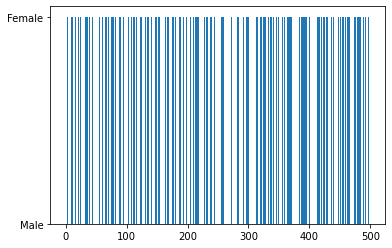

In [3]:
#Vẽ đồ thị thể hiện kết quả 
# unique_gender
import pandas as pd
import matplotlib.pyplot as plt
path = 'Data_Excercise/csv_Data_BMI.csv'
df_bmi = pd.read_csv(path)

plt.bar(df_bmi['Gender'].index,df_bmi['Gender'].values)

In [4]:
#Thống kê theo cân nặng
unique_weight = df_bmi['Weight_kg'].value_counts()
unique_weight

50     9
104    9
80     9
154    8
54     8
      ..
112    1
63     1
129    1
91     1
134    1
Name: Weight_kg, Length: 110, dtype: int64

In [5]:
type(unique_weight)

pandas.core.series.Series

<BarContainer object of 110 artists>

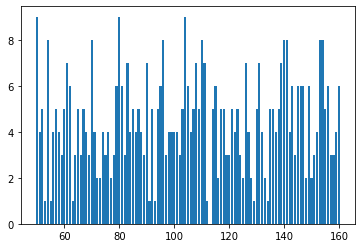

In [44]:
plt.bar(unique_weight.index,unique_weight.values)

# THỰC HÀNH 2:
---
**Yêu cầu 1.1:**
1. Đọc dữ liệu từ file .csv vào biến kiểu dataframe: df_patient với cột id là cột chỉ số (index_col)
2. Đặt lại tên các cột dữ liệu trong Dataframe: 
    * Feature_1 --> Age
    * Feature_2 --> Gender
    * Feature_3 --> Type
    * Feature_4 --> Blood_pressure
    * Feature_5 --> Cholesterol
    * Feature_6 --> Heartbeat
    * Feature_7 --> Thalassemia
    * Feature_8 --> Result

In [6]:
#{VIẾT CODE Ở ĐÂY}
import pandas as pd
path = 'C:/Users/admin/Documents/Python Scripts/pandas/Data_Excercise/Data_Patient.csv'
read = pd.read_csv(path)
read.rename(columns={'feature_1':'Age',
                       'feature_2':'Gender',
                       'feature_3': ' Type',
                       'feature_4':'Blood_pressure',
                       'feature_5':'Cholesterol',
                      'feature_6':'Heartbeat', 
                      'feature_7':'Thalassemia', 
                      'feature_8':'Result' 
                    }, inplace=True)
read





,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
0,Patient_01,63,Male,Typical angina,145,233,150,6.0,0
1,Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
2,Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
3,Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
4,Patient_05,41,Female,Atypical angina,130,204,172,NaN,0
...,...,...,...,...,...,...,...,...,...
295,Patient_296,59,Male,Asymptomatic,164,176,90,6.0,1
296,Patient_297,57,Female,Asymptomatic,140,241,123,7.0,1
297,Patient_298,45,Male,Typical angina,110,264,132,7.0,1
298,Patient_299,68,Male,Asymptomatic,144,193,141,7.0,1


**Yêu cầu 2.2:**
Lọc dữ liệu trong df_patient thành các DataFrame:
    * df_male: chứa danh sách bệnh nhân Nam
    * df_female: chứa danh sách bệnh nhân nữ
    * df_no: danh sách những người không bị bệnh đau tim
    * df_yes: danh sách những người bị bệnh đau tim

In [15]:
import pandas as pd
path = 'C:/Users/admin/Documents/Python Scripts/pandas/Data_Excercise/Data_Patient.csv'
read = pd.read_csv(path)
read.rename(columns={'feature_1':'Age',
                       'feature_2':'Gender',
                       'feature_3':'Type',
                       'feature_4':'Blood_pressure',
                       'feature_5':'Cholesterol',
                      'feature_6':'Heartbeat', 
                      'feature_7':'Thalassemia', 
                      'feature_8':'Result' 
                    }, inplace=True)
male = read[read.Gender=='Male']
female = read[read.Gender== 'Female']
# result = {
#     0:'No',
#     1:'Yes'
# }

# read.replace(result,inplace =True)
A = read[read.Result == 1]
B = read[read.Result == 0]
B.head(10)


,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
0,Patient_01,63,Male,Typical angina,145,233,150,6.0,0
3,Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
4,Patient_05,41,Female,Atypical angina,130,204,172,NaN,0
5,Patient_06,56,Male,Atypical angina,120,236,178,3.0,0
7,Patient_08,57,Female,Asymptomatic,120,354,163,3.0,0
10,Patient_11,57,Male,Asymptomatic,140,192,148,6.0,0
11,Patient_12,56,Female,Atypical angina,140,294,153,3.0,0
13,Patient_14,44,Male,Atypical angina,120,263,173,7.0,0
14,Patient_15,52,Male,Non-anginal pain,172,199,162,7.0,0
15,Patient_16,57,Male,Non-anginal pain,150,168,174,3.0,0


**Yêu cầu 2.3:**
Lọc trong df_patient dưa ra danh sách bệnh nhân thỏa mãn yêu cầu sau:
1. Những người bị mắc bệnh đau tim và trên 70 tuổi
2. Người có giới tính Female, có huyết áp trên 170 mmhg nhưng không bị bệnh đau tim.
3. Những người có triệu chứng đau ngực là Typical angina, giới tính Male và bị bệnh đau tim.

In [24]:
#{VIẾT CODE Ở ĐÂY}

C = read[(read.Result == 1)& (read.Age > 70)]
D = read[(read.Gender == 'Female')& (read.Blood_pressure > 170)& (read.Result == 0)]
E = read[(read.Type == 'Typical angina')&(read.Gender == 'Male')&(read.Result == 1)]


E


,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
123,Patient_124,65,Male,Typical angina,138,282,174,3.0,1
140,Patient_141,59,Male,Typical angina,170,288,159,7.0,1
198,Patient_199,59,Male,Typical angina,160,273,125,3.0,1
210,Patient_211,38,Male,Typical angina,120,231,182,7.0,1
242,Patient_243,61,Male,Typical angina,134,234,145,3.0,1
273,Patient_274,59,Male,Typical angina,134,204,162,3.0,1
297,Patient_298,45,Male,Typical angina,110,264,132,7.0,1


**Yêu cầu 2.4:** Xác định:
1. Chỉ số huyết áp (Blood_pressure) thấp nhất, cao nhất, trung bình, trung vị và độ lệch chuẩn của tập dữ liệu
2. Chỉ số nhịp tim (Heartbeat) thấp nhất, cao nhất, trung bình, trung vị và độ lệch chuẩn của tập dữ liệu


In [26]:
#{VIẾT CODE Ở ĐÂY}

A = read['Blood_pressure'].min()
B= read['Blood_pressure'].max()
C =  read['Blood_pressure'].mean()
D = read['Blood_pressure'].median()
E =  read['Blood_pressure'].std()





17.682497692285477

**Yêu cầu 2.5: Xác định:**
1. Số giá trị khác nhau của thuộc tính Type
2. Vẽ đồ thị dạng cột thể hiện kết quả thống kê số lượng theo từng giá trị khác nhau của thuộc tính Type


In [21]:
#{VIẾT CODE Ở ĐÂY}
# import pandas as pd
# A = read['Type'].unique()
# A

import matplotlib.pyplot as plt
# import pandas as pd
# path = 'C:/Users/admin/Documents/Python Scripts/pandas/Data_Excercise/Data_Patient.csv'
# read = pd.read_csv(path)
read.rename(columns={'feature_1':'Age',
                       'feature_2':'Gender',
                       'feature_3':'Type',
                       'feature_4':'Blood_pressure',
                       'feature_5':'Cholesterol',
                      'feature_6':'Heartbeat', 
                      'feature_7':'Thalassemia', 
                      'feature_8':'Result' 
                    }, inplace=True)
unique_type = read['Type'].value_counts()
unique_type



Asymptomatic        139
Non-anginal pain     84
Atypical angina      49
Typical angina       23
Name: Type, dtype: int64

<BarContainer object of 4 artists>

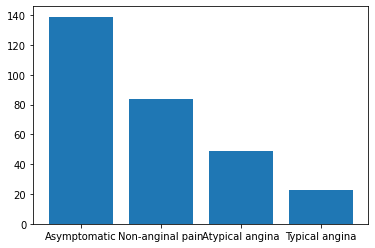

In [25]:
#{VIẾT CODE Ở ĐÂY}
plt.bar(unique_type.index, unique_type.values)







# THỰC HÀNH 3:

BVN